## Generate Fig 4 
Scaling and fitting AHE mechanisms


In [16]:
import pandas as pd 
import os
import glob
import sys
import subprocess
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from pylab import *
plt.style.use('ggplot')
import matplotlib.gridspec as gridspec
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16.5})

Import all the data

In [2]:
%run "D:/PPMS Data/Analysis/CMG Tdep/CMG_routines_corr.py"

In [3]:
data_A065 = pd.read_csv('D:/PPMS Data/Analysis/CMG Tdep/data_CMG_A065_corr.csv', index_col=0)
data_A074 = pd.read_csv('D:/PPMS Data/Analysis/CMG Tdep/data_CMG_A074_corr.csv', index_col=0)
data_A075 = pd.read_csv('D:/PPMS Data/Analysis/CMG Tdep/data_CMG_A075_corr.csv', index_col=0)
CMG = {3.5:data_A065,4.1:data_A074, 5.5:data_A075}

Fit the resistivity with a pure 'intrinsic' term:
$$ \rho_{xy} = b \rho_{xx}^2$$

In [4]:
x_fit_r = np.arange(0,1.4E-4,1E-6)

# The trilayers:
fit_A065_quad = fit_quad(data_A065,30)
fit_A074_quad = fit_quad(data_A074,30)
fit_A075_quad = fit_quad(data_A075,30)


y_fit_A065_quad = func_quad(x_fit_r,fit_A065_quad)
y_fit_A074_quad = func_quad(x_fit_r,fit_A074_quad)
y_fit_A075_quad = func_quad(x_fit_r,fit_A075_quad)

Fit the resistivity with and intrinsic plus extrinsic form:
$$ \rho_{xy} = a \rho_{xx} + b \rho_{xx}^2$$

In [5]:
fit_A065_p2 = fit_p2(data_A065,30)
fit_A074_p2 = fit_p2(data_A074,30)
fit_A075_p2 = fit_p2(data_A075,30)
y_fit_A065_p2 = func_p2(x_fit_r,fit_A065_p2[0],fit_A065_p2[1])
y_fit_A074_p2 = func_p2(x_fit_r,fit_A074_p2[0],fit_A074_p2[1])
y_fit_A075_p2 = func_p2(x_fit_r,fit_A075_p2[0],fit_A075_p2[1])

Fit the resistivity with and intrinsic plus _constant_ extrinsic form:
$$ \rho_{xy} = a' \rho_{xx0} + b \rho_{xx}^2$$

This seems to be the current preferred form (see Phys. Rev. Lett. __103__, 087206)

It arises from the fact that the resistivity can be split into the residual and phonon parts $\rho_{xx} = \rho_{xx0} + \rho_{xxT}$. The expression for $\rho_{xy}$ becomes
$$ \rho_{xy} = a( \rho_{xx0}+\rho_{xxT}) + b \rho_{xx}^2$$.

However, the paper above argues (and shows) that the phonon part is negligible, and so only the residual term needs to be considered.

In [6]:
fit_A065_p3 = fit_p3(data_A065,30,3.46)
fit_A074_p3 = fit_p3(data_A074,30,4.1)
fit_A075_p3 = fit_p3(data_A075,30,5.5)
y_fit_A065_p3 = func_p3_A065(x_fit_r,fit_A065_p3[0],fit_A065_p3[1])
y_fit_A074_p3 = func_p3_A074(x_fit_r,fit_A074_p3[0],fit_A074_p3[1])
y_fit_A075_p3 = func_p3_A075(x_fit_r,fit_A075_p3[0],fit_A075_p3[1])

## Plot the fits on the data

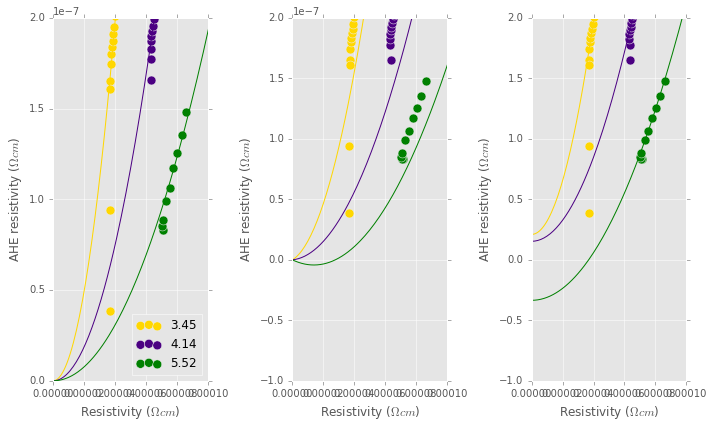

In [12]:
fig1 = plt.figure(figsize=(10,6))

ax1 = fig1.add_subplot(131)
ax1.scatter(data_A065.Resistivity_CMG, data_A065.AHE_r_ratio, c='gold', s=80,label = data_A065.Thickness[0])
ax1.scatter(data_A074.Resistivity_CMG, data_A074.AHE_r_ratio, c='indigo', s=80, label = data_A074.Thickness[0])
ax1.scatter(data_A075.Resistivity_CMG, data_A075.AHE_r_ratio, c='green', s=80, label = data_A075.Thickness[0])

ax1.plot(x_fit_r,y_fit_A065_quad,c='gold')
ax1.plot(x_fit_r,y_fit_A074_quad, c='indigo')
ax1.plot(x_fit_r,y_fit_A075_quad, c='green')

ax1.set_ylabel('AHE resistivity ($\Omega cm$)')
ax1.set_xlabel('Resistivity ($\Omega cm$)')
ax1.set_ylim(0E-7,2E-7)
ax1.set_xlim(0E-6,1E-4)
ax1.legend(loc=4)

ax2 = fig1.add_subplot(132)
ax2.scatter(data_A065.Resistivity_CMG, data_A065.AHE_r_ratio, c='gold', s=80,label = data_A065.Thickness[0])
ax2.scatter(data_A074.Resistivity_CMG, data_A074.AHE_r_ratio, c='indigo', s=80, label = data_A074.Thickness[0])
ax2.scatter(data_A075.Resistivity_CMG, data_A075.AHE_r_ratio, c='green', s=80, label = data_A075.Thickness[0])

ax2.plot(x_fit_r,y_fit_A065_p2,c='gold')
ax2.plot(x_fit_r,y_fit_A074_p2, c='indigo')
ax2.plot(x_fit_r,y_fit_A075_p2, c='green')

ax2.set_ylabel('AHE resistivity ($\Omega cm$)')
ax2.set_xlabel('Resistivity ($\Omega cm$)')
ax2.set_ylim(-1E-7,2E-7)
ax2.set_xlim(0E-6,1E-4)

ax3 = fig1.add_subplot(133)
ax3.scatter(data_A065.Resistivity_CMG, data_A065.AHE_r_ratio*1E7, c='gold', s=80,label = data_A065.Thickness[0])
ax3.scatter(data_A074.Resistivity_CMG, data_A074.AHE_r_ratio*1E7, c='indigo', s=80, label = data_A074.Thickness[0])
ax3.scatter(data_A075.Resistivity_CMG, data_A075.AHE_r_ratio*1E7, c='green', s=80, label = data_A075.Thickness[0])

ax3.plot(x_fit_r,y_fit_A065_p3*1E7,c='gold')
ax3.plot(x_fit_r,y_fit_A074_p3*1E7, c='indigo')
ax3.plot(x_fit_r,y_fit_A075_p3*1E7, c='green')

ax3.set_ylabel('AHE resistivity ($\Omega cm$)')
ax3.set_xlabel('Resistivity ($\Omega cm$)')
ax3.set_ylim(-1,2)
ax3.set_xlim(0E-6,1E-4)

fig1.tight_layout()

## Plot the fitting params

In [8]:
fits3 = [fit_A065_p3,fit_A074_p3,fit_A075_p3]
fits2 = [fit_A065_p2,fit_A074_p2,fit_A075_p2]
fits1 = [fit_A065_quad,fit_A074_quad,fit_A075_quad]
t = [3.45,4.14,5.52]
a_2 = []
a_3 = []
b_2 = []
b_3 = []
b_1=[]

for item in fits3:
    a_3.append(item[0])
    b_3.append(item[1])
for item in fits2:
    a_2.append(item[0])
    b_2.append(item[1])
for item in fits1:
    b_1.append(item[0])

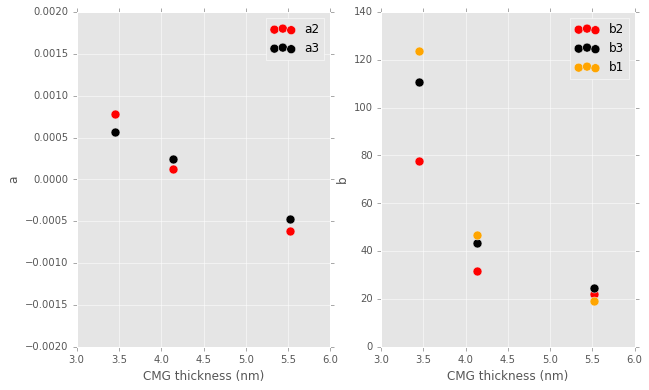

In [9]:
fig1 = plt.figure(figsize=(10,6))

ax1 = fig1.add_subplot(121)
ax1.set_xlabel('CMG thickness (nm)')
ax1.set_ylabel('a')
ax1.scatter(t, a_2, c='red', s=80,label = 'a2')
ax1.scatter(t,a_3, c='black', s=80, label = 'a3')
ax1.set_ylim(-2E-3,2E-3)
ax1.legend()

ax2 = fig1.add_subplot(122)
ax2.set_xlabel('CMG thickness (nm)')
ax2.set_ylabel('b')
ax2.scatter(t, b_2, c='red', s=80,label = 'b2')
ax2.scatter(t,b_3, c='black', s=80, label = 'b3')
ax2.scatter(t,b_1, c='orange', s=80, label = 'b1')
ax2.legend()

# Generate the final figure

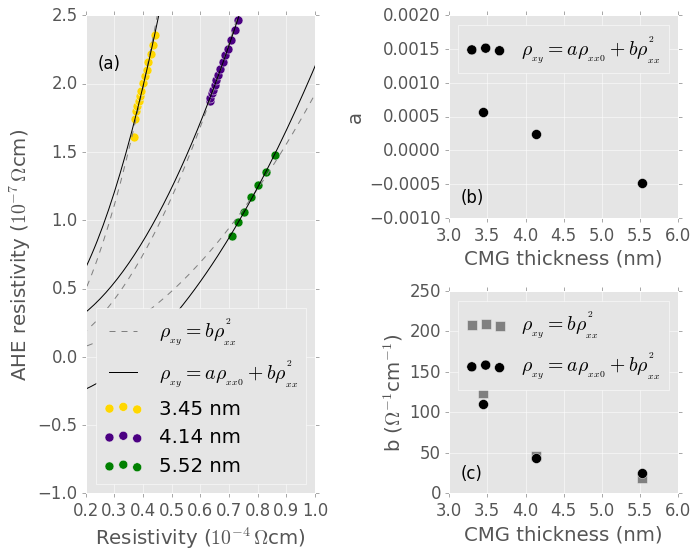

In [35]:
fig1 = plt.figure(figsize=(10,8))

gs1 = gridspec.GridSpec(2,2)
#gs1.update(left=0.01, right=0.3, wspace=0.8)
ax1 = plt.subplot(gs1[:, 0])
ax2 = plt.subplot(gs1[0, 1])
ax3 = plt.subplot(gs1[1,1])

data_A065_f = data_A065[(data_A065.Temperature > 30)]
data_A074_f = data_A074[(data_A074.Temperature > 30)]
data_A075_f = data_A075[(data_A075.Temperature > 30)]

"""
Fill in left hand column
"""
factor_ahe = 1E7
factor_rho = 1E4

ax1.scatter(data_A065_f.Resistivity_CMG*factor_rho, data_A065_f.AHE_r_ratio*factor_ahe, c='gold', s=80,label = str(data_A065.Thickness[0])+' nm')
ax1.scatter(data_A074_f.Resistivity_CMG*factor_rho, data_A074_f.AHE_r_ratio*factor_ahe, c='indigo', s=80, label = str(data_A074.Thickness[0])+' nm')
ax1.scatter(data_A075_f.Resistivity_CMG*factor_rho, data_A075_f.AHE_r_ratio*factor_ahe, c='green', s=80, label = str(data_A075.Thickness[0])+' nm')

ax1.set_ylim(-1,2.5)
ax1.set_xlim(2E-1,10E-1)
ax1.set_ylabel(r'AHE resistivity ($10^{-7} \, \Omega$cm)')
ax1.set_xlabel(r'Resistivity ($10^{-4} \, \Omega$cm)')

ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.get_xaxis().get_offset_text().set_x(1.1)

#Show the pure quadratic fit
ax1.plot(x_fit_r*factor_rho,y_fit_A065_quad*factor_ahe,ls='--',c='gray',label=r'$\rho_{_{xy}} = b \rho_{_{xx}}^{^2}$')
ax1.plot(x_fit_r*factor_rho,y_fit_A074_quad*factor_ahe,ls='--', c='gray')
ax1.plot(x_fit_r*factor_rho,y_fit_A075_quad*factor_ahe,ls='--', c='gray')

#Show the optimal fit
ax1.plot(x_fit_r*factor_rho,y_fit_A065_p3*factor_ahe,c='black',label=r'$\rho_{_{xy}} = a \rho_{_{xx0}} + b \rho_{_{xx}}^{^2}$')
ax1.plot(x_fit_r*factor_rho,y_fit_A074_p3*factor_ahe, c='black')
ax1.plot(x_fit_r*factor_rho,y_fit_A075_p3*factor_ahe, c='black')

ax1.legend(loc=3)
ax1.annotate('(a)', xy=(.1, 0.9), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')


"""
Fill in top right
"""
ax2.set_xlabel('CMG thickness (nm)')
ax2.set_ylabel('a')
#ax2.scatter(t, a_2, c='gray', s=80,label=r'$\rho_{xy} = b \rho_{xx}^2$')
ax2.scatter(t,a_3, c='black', s=100,label=r'$\rho_{_{xy}} = a \rho_{_{xx0}} + b \rho_{_{xx}}^{^2}$')
ax2.set_ylim(-1E-3,2E-3)
ax2.legend()

ax2.annotate('(b)', xy=(.1, 0.1), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')


"""
Fill in bottom right
"""
ax3.set_xlabel('CMG thickness (nm)')
ax3.set_ylabel('b ($\Omega^{-1}$cm$^{-1}$)')
ax3.set_ylim(0,250)
#ax3.scatter(t, b_2, c='red', s=80,label = 'b2')
ax3.scatter(t,b_1, c='gray',marker = 's', s=100, label=r'$\rho_{_{xy}} = b \rho_{_{xx}}^{^2}$')
ax3.scatter(t,b_3, c='black', s=100, label=r'$\rho_{_{xy}} = a \rho_{_{xx0}} + b \rho_{_{xx}}^{^2}$')

ax3.legend()
ax3.annotate('(c)', xy=(.1, 0.1), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')


fig1.tight_layout()
#savefig('Fig4.jpg',dpi=600,bbox_inches='tight')
#savefig('Fig4.pdf',dpi=900,bbox_inches='tight')